# Representation I
## Practical Exercises

### Exercise 2
** Archipelago:** We will experiment with using nearest neighbour to do prediction for **PARITY** under two input distributions: 
1. Uniform distribution, and 
2. Uniform distribution over instances with at most two nonzero inputs.

Using a 20 dimensional input, we will randomly select 10,000 training examples.

Before running the experiment, enter your prediction of the outcome in Archipelago:<br>
A. Nearest neighbour does WELL on both (1) and (2).<br>
B. Nearest neighbour does WELL on (1) but POORLY on (2). <br>
C. Nearest neighbour does POORLY on (1) but WELL on (2).<br>
D. Nearest neighbour does POORLY  on both (1) and (2).

In [1]:
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score

train_size = 10000
test_size = 1000
input_size = 20

np.random.seed(0)

# Construct training and test sets
# Uniform input distribution
train_data1 = np.random.randint(2,size=(train_size,input_size))
train_label1 = train_data1.sum(axis=1)%2
test_data1 = np.random.randint(2,size=(test_size,input_size))
test_label1 = test_data1.sum(axis=1)%2 # compute PARITY
# Uniform distribution over instances with at most two nonzero inputs
train_data2 = np.zeros((train_size,input_size))
for i in range(0,train_size):
    num_ones = np.random.randint(3)
    curr = np.array([1] * num_ones + [0] * (input_size - num_ones))
    np.random.shuffle(curr)
    train_data2[i] = curr
train_label2 = train_data2.sum(axis=1)%2
test_data2 = np.zeros((test_size,input_size))
for i in range(0,test_size):
    num_ones = np.random.randint(3)
    curr = np.array([1] * num_ones + [0] * (input_size - num_ones))
    np.random.shuffle(curr)
    test_data2[i] = curr
test_label2 = test_data2.sum(axis=1)%2

# Run nearest neighbour classifier
clf1 = neighbors.KNeighborsClassifier(1)
clf1.fit(train_data1, train_label1)
predict1 = clf1.predict(test_data1)
clf2 = neighbors.KNeighborsClassifier(1)
clf2.fit(train_data2, train_label2)
predict1 = clf1.predict(test_data1)
accuracy1 = accuracy_score(test_label1, predict1)
predict2 = clf2.predict(test_data2)
accuracy2 = accuracy_score(test_label2, predict2)

# Print accuracies
print("Test set accuracy for uniform distribution: " + "{0:.2f}".format(accuracy1))
print("Test set accuracy for uniform distribution over instances with at most 2 nonzero inputs: " + "{0:.2f}".format(accuracy2))

Test set accuracy for uniform distribution: 0.69
Test set accuracy for uniform distribution over instances with at most 2 nonzero inputs: 1.00


### Exercise 4
** Archipelago:** Do you think doing feature selection would be helpful when using nearest neighbour for text classification? Answer with a phrase before running the experiment.

We will use the 20 Newsgroup dataset in the experiment which uses the chi square method.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import neighbors
from sklearn.metrics import accuracy_score

# Select only 4 categories to speed things up
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

# Fetch training and test sets
twenty_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'),
                                  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'),
                                 categories=categories, shuffle=True, random_state=42)

# Use tfidf
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(twenty_train.data)
vectors_test = vectorizer.transform(twenty_test.data)

# No feature selection
clf = neighbors.KNeighborsClassifier(1)
clf.fit(vectors, twenty_train.target)
predict = clf.predict(vectors_test)
accuracy = accuracy_score(twenty_test.target, predict)
print("Accuracy with no feature selection: " + "{0:.2f}".format(accuracy))

# Feature selection with different number of features selected
fs_num = [50, 100, 500, 1000, 5000]
for i in fs_num:
    fs = SelectKBest(chi2, k=i)
    vectors_fs = fs.fit_transform(vectors, twenty_train.target)
    vectors_test_fs = fs.transform(vectors_test)
    clf = neighbors.KNeighborsClassifier(1)
    clf.fit(vectors_fs, twenty_train.target)
    predict = clf.predict(vectors_test_fs)
    accuracy = accuracy_score(twenty_test.target, predict)
    print("Accuracy with " + str(i) + " features: " + "{0:.2f}".format(accuracy))  

Accuracy with no feature selection: 0.30
Accuracy with 50 features: 0.55
Accuracy with 100 features: 0.60
Accuracy with 500 features: 0.58
Accuracy with 1000 features: 0.55
Accuracy with 5000 features: 0.34


### Exercise 5
![Iris image](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/84f03ae1d048482471f2a9ca85b0c649730cc269/images/03_iris.png "Image from https://github.com/justmarkham/scikit-learn-videos/blob/master/03_getting_started_with_iris.ipynb")
<center>*Image from https://github.com/justmarkham/scikit-learn-videos/blob/master/03_getting_started_with_iris.ipynb*</center>

The Iris dataset contains 50 samples each of three types of the Iris flower: Iris Setosa, Iris Versicolor, and Iris Virginica. For each sample, the following measurements are given: sepal length, sepal width, petal width, petal length.

Run the experiment to build a decision tree for classifying Iris flowers based on their measurements.

From the visualization of the tree, write down a rule that correctly classifies all cases of Iris Setosa. How many disjunction of rules would cover all cases of positive instances of Iris Versicolor?

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

from IPython.display import Image
import pydotplus 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Exercise 6
In this exercise, we look at the performance of learning a decision tree on DISTINCT. We will also try using ensemble (weighted average) of decision trees on the same problem.  

Before running the experiment, predict which algorithm would do better and say why. 

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

train_size = 1000
test_size = 1000
input_size = 20

np.random.seed(0)

# Construct training and test sets
train_data = np.random.randint(2,size=(train_size,input_size))
train_data[:,int(input_size/2):] = train_data[:,:int(input_size/2)] # make equal
# Create labels
train_label = np.zeros(train_size)
for i in range(0,train_size):
    distinct = np.random.randint(2) # Equally likely to be distinct
    if (distinct == 1):
        train_label[i] = 1
        rand_pos = np.random.randint(input_size/2) # randomly select an input and make it different
        train_data[i][rand_pos] = (train_data[i][rand_pos]+1)%2
        
test_data = np.random.randint(2,size=(test_size,input_size))
test_data[:,int(input_size/2):] = test_data[:,:int(input_size/2)] # make equal
test_label = np.zeros(test_size)
for i in range(0,test_size):
    distinct = np.random.randint(2)
    if (distinct == 1):
        test_label[i] = 1
        rand_pos = np.random.randint(input_size/2)
        test_data[i][rand_pos] = (test_data[i][rand_pos]+1)%2

clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(train_data, train_label)
predict = clf.predict(test_data)
accuracy = accuracy_score(test_label, predict)
print("DT accuracy on DISTINCT: " + "{0:.2f}".format(accuracy))

clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2),
                         n_estimators=50,random_state=42)
clf = clf.fit(train_data, train_label)
predict = clf.predict(test_data)
accuracy = accuracy_score(test_label, predict)
print("Boosted decision tree accuracy on DISTINCT: " + "{0:.2f}".format(accuracy))

DT accuracy on DISTINCT: 0.69
Boosted decision tree accuracy on DISTINCT: 1.00


### Exercise 7

The **Australian** credit approval dataset illustrates multiple practical issues.
* Missing feature values: This is very common in practice. This can be handled in various ways.
 * Removing instances with missing feature values. This may be fine if the number of such instances is small. However, the issue still has to be handled when the predictor is deployed.
 * Imputing (predicting and filling in) the missing values. May affect performance if prediction is poor.
 * Encoding the missing value as a special value. This may be appropriate if the value is not missing at random and being missing actually provides some information.
 * Algorithm specific method. Decision trees have specific methods for handling missing values (e.g. averaging over both paths down the tree at the missing node) but this is not implemented in Scikit Learn. Generative models handle missing values naturally as part of probabilistic inference.
* The Australian dataset has a mix of continuous and categorical feature.
* For confidentiality purposes, feature names and values have been changed into meaningless symbols in the dataset. As a result, we cannot use our exploit knowledge of the problem to construct better predictors. One question is how to handle the categorical feature.
 * If the feature is an ordinal variable, i.e. the values are ordered, it may sometimes be useful to map the values to integers or reals, particularly if we expect the target value to change monotonically with the value of the feature.
 * If the feature is a nominal variable, i.e. the values cannot be ordered, mapping the values to integers or reals may not make sense. Some decision tree algorithms can do a multiway split at the variable with one child for each possible variable value. However, Scikit Learn simply treats all variables as integers/reals and do binary tests with $\leq$.
 
 
In this dataset, missing values are handled by imputation: mean values are used for continuous variables, and mode is used for categorical variables. For datasets like this, one strength of decision trees is that it is somewhat less sensitive to appropriate processing of variables.

Before running the experiments, answer the following in Archipelago.

Do you think the decision tree algorithm is sensitive to scaling of the variables? Yes or No.
 

In [5]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors

X, y = load_svmlight_file("australian.txt")
# Should really repeat this with many random splits to get more reliable results; try various splits
# by changing random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Scale and split data
scaler = preprocessing.MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision tree on original data
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print("DT accuracy with original data: " + "{0:.2f}".format(accuracy))

# Decision tree on scaled data
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train_scaled, y_train)
predict = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predict)
print("DT accuracy with scaled data: " + "{0:.2f}".format(accuracy) + "\n")

# Nearest neighbour on original data
clf = neighbors.KNeighborsClassifier(1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print("NN accuracy with original data: " + "{0:.2f}".format(accuracy))

# Nearest neighbour on scaled data
clf = neighbors.KNeighborsClassifier(1)
clf = clf.fit(X_train_scaled, y_train)
predict = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predict)
print("NN accuracy with scaled data: " + "{0:.2f}".format(accuracy) + "\n")

# Boosted decision tree on original data
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=5),
                         n_estimators=50,random_state=42)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print("Boosted decision tree accuracy with original data: " + "{0:.2f}".format(accuracy))

FileNotFoundError: [Errno 2] No such file or directory: 'australian.txt'

In [ ]:
DT original: 0.82
DT scaled  : 0.81
    
NN original: 0.67
NN scaled  : 0.80 (More sensitive to scaling)

### Exercise 8
In Scikit Learn, the SVC classifier optimizes $\frac{1}{2}\|\mathbf{w}\|^2 + C\sum_{i=1}^m \xi_i$. In the experiment, we create a separable dataset from two Gaussians in 2 dimension centered at $(2,2)$ and $(-2,-2)$ and run the soft SVM with $C=1$ and $C=0.001$. In the plots
* The decision boundary is the solid line.
* The dotted lines are the lines where the function has magnitude 1.
* The larger circles show the points where $\alpha_i\neq 0$.
Write down some observations about the resulting plots.

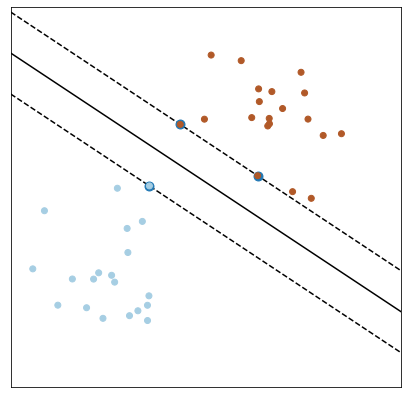

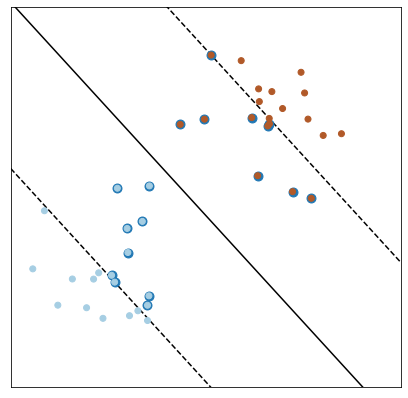

In [9]:
# Modified from  http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html.
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# we create 40 separable points
np.random.seed(2)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('reg1', 1), ('reg2', 0.01)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane with function value 1
    yy_down = yy - 1/w[1]
    yy_up = yy + 1/w[1]

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(7, 7))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -5
    x_max = 5
    y_min = -5
    y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

### Exercise 9
In the **Adult Census dataset** we are given information about individuals obtained from the US census and asked to predict whether the person earns more than US\$50K a year. The features consist of 
* Continuous features "Age", "fnlwgt", "Education-Num", "Capital Gain", "Capital Loss", "Hours per week", and
* Categorical features "Workclass", "Education", "Marital Status", "Occupation", "Relationship", "Race", "Sex", "Country". 

Categorical features cannot be used directly in a linear classifier. One simple way to handle this is to simply map each category of a feature to an integer.

Before running the exercise, think of a potentially better way to handle categorical variable and write it down. Run the experiment, then discuss.

In [10]:
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
                 "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
                 "Hours per week", "Country"]
data = np.genfromtxt('adult.txt', delimiter=', ', dtype=str)

# Extract labels
labels = data[:,14]
le= preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
data = data[:,:-1]

# Transform categorical features into integers
categorical_features = [1,3,5,6,7,8,9,13]
categorical_names = {}
for feature in categorical_features:
    le = preprocessing.LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_
data = data.astype(float)

# Scale and split data
scaler = preprocessing.MaxAbsScaler()
data_scaled = scaler.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.33, random_state=42)

# SVM classifier
clf = svm.LinearSVC(loss='hinge', C=1, random_state = 42)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print("SVM accuracy: " + "{0:.2f}".format(accuracy))

# Now use one hot encoder for categorical features
encoder = preprocessing.OneHotEncoder(categorical_features=categorical_features)
encoder.fit(data)
encoded_data = encoder.transform(data)
data_onehot_scaled = scaler.fit_transform(encoded_data)
X_train, X_test, y_train, y_test = train_test_split(data_onehot_scaled, labels, test_size=0.33, random_state=42)

# SVM on data with categorical features encoded using one hot encoding
clf = svm.LinearSVC(loss='hinge', C=1, random_state = 42)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, predict)
print("SVM one hot encoding accuracy: " + "{0:.2f}".format(accuracy))

OSError: adult.txt not found.

### Exercise 10
Linear classifiers work quite well for certain applications. They usually work quite well for text classification.

Run the experiment and suggest some reasons why linear classifiers may work well for text classification. Suggest possible ways to improve text classification (not necessarily for this dataset).

In [11]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import neighbors
from sklearn import tree

# Select only 4 categories to speed things up
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

# Fetch training and test sets
twenty_train = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'),
                                  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'),
                                 categories=categories, shuffle=True, random_state=42)

# Use tfidf
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(twenty_train.data)
vectors_test = vectorizer.transform(twenty_test.data)
clf = svm.LinearSVC(loss='hinge', C=100)
clf.fit(vectors, twenty_train.target)
predict = clf.predict(vectors_test)
accuracy = accuracy_score(twenty_test.target, predict)
print("SVM accuracy: " + "{0:.2f}".format(accuracy))

fs = SelectKBest(chi2, k=100)
vectors_fs = fs.fit_transform(vectors, twenty_train.target)
vectors_test_fs = fs.transform(vectors_test)
clf = neighbors.KNeighborsClassifier(1)
clf.fit(vectors_fs, twenty_train.target)
predict = clf.predict(vectors_test_fs)
accuracy = accuracy_score(twenty_test.target, predict)
print("NN accuracy with 100 features (prev best NN performer): " + "{0:.2f}".format(accuracy))

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(vectors, twenty_train.target)
predict = clf.predict(vectors_test)
accuracy = accuracy_score(twenty_test.target, predict)
print("Decision Tree accuracy of : " + "{0:.2f}".format(accuracy))

C:\Users\tey_s\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM accuracy: 0.81
NN accuracy with 100 features (prev best NN performer): 0.60
Decision Tree accuracy of : 0.61
